# Activity 1: Coding Your Own Fourier Transform
In this activity, we will get comfortable with functions and review plotting in python, then we will combine those skills to write some code which is able to Fourier Transform a combination of cosine waves.

## Learning Objectives:
* Using Python libraries to perform mathematical operations and plot data
* Writing and using functions to make writing code easier
* Coding the Fourier transform using mathematical principles
* Understanding how changes in the input function affect the resulting Fourier transform

In this activity, `?`s have been used to represent values or variable names which need replacing. Do not replace or rewrite any of the code other than what is marked with a `?`. The code will run without errors if you replace the `?`s with the correct values.

# Part 1: Building and plotting waves.

Similar to the pre-lab, we will import "libraries", or freely available, pre-written helper-programs to perform complex computing tasks and to plot functions. **Remember:** To run a cell, press the “play” button that is directly to the left, or use Shift and Enter at the same time on the keyboard.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# We will also set some plotting parameters for you
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'serif'

## Writing a Function to Make Sinusoids
A sinusoid is defined by three parameters: its amplitude, frequency, and phase. This activity introduces functions, which allow for easy modification of these three properties.

A function is simply a shortcut to save you from writing the same code many times. The function below essentially provides a template for making a sine wave; think of it as a cookie-cutter, where you put in the ingredients (arguments) and it always gives you a cookie of the same shape (the sinusoid).

The `def` keyword is how python knows we're making a function, then the words in parenthesis are the names of the "arguments" we will pass into the function. (The `=0` is used to specify a default, meaning we don't have to specify a `phase` when we make a wave.)

In [ ]:
def create_wave(amplitude, frequency, time_array, phase=0):
   """
   x(t) = A cos(2π * f * t + ϕ)

   Args:
        amplitude - the amplitude A of the sinusoid
        frequency - the frequency f of the sinusoid
        time_array - time values, t
        phase - the phase ϕ of the sinusoid. Defaults to 0
   """

   wave = amplitude * np.cos(2 * np.pi * frequency * time_array + phase)

   return wave

Now that we have a function which can generate any cosine wave we specify, let's practice by making a few waves.

Note that our function `returns` a wave, meaning we need to store that wave as a variable. Name this variable, then use `= make_wave()` with the arguments in the parenthesis to make the wave described below.

## Using the `create_wave` Function to Make a Wave
Make a wave with an amplitude of $1.0$ and a frequency of $4.0$ which lasts for $2\pi$ seconds. Set the `dt` value to a small number to get a smooth wave (0.01 reccommended). Remember to define your `dt` and your `time_array` as shown in the prelab exercises. Then plot this wave to confirm.

In [ ]:
# Student wave1
dt = ?
time_array = np.arange(0, ?, ?)
wave1 = create_wave(?, ?, time_array)
plt.plot(time_array, wave1)
plt.show()

SyntaxError: invalid syntax (<ipython-input-3-7bcf3c6e57bd>, line 2)

## Customizing the Appearance of a Figure
You'll notice that the graph is lacking common components, such as axis titles and a graph title. To add those components to a graph, use the `plt.xlabel(NAME)` and `plt.ylabel(NAME)` commands to add a `time` label to the x-axis and an `amplitude` label to the y-axis.

We can also title the graph with the `plt.title(NAME)` command.

Note that all of these customization options must go before `plt.show()` to be applied.

In [ ]:
plt.plot(time_array, wave1)
plt.xlabel("?")
plt.ylabel("?")
plt.title("?")
plt.show()

It is also often helpful to be able to zoom in to see a portion of the graph. To achieve this, use the commands `plt.xlim(LOWER, UPPER)` and `plt.ylim(LOWER, UPPER)` to set the bounds of the axes. Use this to zoom into the wave between 0 and 1 seconds.

In [ ]:
plt.plot(time_array, wave1)

# Copy/Paste your labels from above to avoid excessive labeling.
plt.xlabel("?")
plt.ylabel("?")
plt.title("?")

# Zoom in to view the plot between t=0 and t=1
plt.xlim(?, ?)
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-a368cdd033eb>, line 9)

Below are some other options for customizing the appearance of a figure. Comment them in and out to see what effect they have. [This](https://matplotlib.org/stable/users/explain/customizing.html) is also a resource for further graph customization. Don't forget to label your axes moving forward!





In [ ]:
plt.plot(time_array, wave1)
# Copy/Paste your labels and settings from above to avoid excessive labeling.
plt.xlabel("?")
plt.ylabel("?")
plt.title("?")
plt.xlim(?, ?)

# plt.grid(True, which = "major", axis = "x")
# plt.yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
# plt.legend(["wave1"], loc="upper right")
# plt.rcParams['font.size'] = 12
# plt.plot(time_array, wave1, marker = 'o', markerfacecolor = 'green')

plt.show()

SyntaxError: invalid syntax (<ipython-input-5-79289ab53082>, line 6)

### Question 1
Explain in your own words what the plt.grid and plt.legend commands do.

Now, using the same `time_array`, create a second wave with different parameters.

In [ ]:
# Create a second wave:
wave2 = create_wave(?, ?, ?)

# Plot the wave:
plt.plot(?, wave1)
plt.plot(?, wave2)

# Paste labels from above:
plt.xlabel("?")
plt.ylabel("?")
plt.title("?")
plt.xlim(?, ?)
plt.show()

In [ ]:
# Make a variable to store the combined wave and plot it:
combined_wave = ? + ?
plt.plot(?, ?)

# Paste the graph labels:
plt.xlabel("?")
plt.ylabel("?")
plt.title("?")
plt.xlim(?, ?)
plt.show()

SyntaxError: invalid syntax (<ipython-input-6-eafa9579f5a2>, line 2)

### Question 2
What happens when you add the two waves together? Comment on the behavior of the amplitude of the resultant wave. What causes this?

# Part 2: Making the connection between sound and notes

Now that we know the basics of how to make and plot sinusoidal waves, we will look into a common application of the Fourier transform, sound processing. For all subsequent parts, plotting functions is critical, so feel free to look back on this part for reminders on plotting and graph customization.

To do this next part, we will need to load the libraries `ipywidgets` and `IPython`. Unlike `numpy` which comes standard with GoogleColab, we will need to install these to the notebook using `pip`. To do this, run the cells below. This should take ~1 minute to complete.

In [ ]:
! pip install ipywidgets -q
! pip install IPython -q

from ipywidgets import interact
from ipywidgets import widgets
from IPython.display import Audio, display

In music, the term *chord* is given to the sound produced from playing multiple notes at once. Below is a provided function to help visualize how multiple sound waves can be combined to play a chord and what the resulting Fourier transform looks like.

The code below may look daunting, but there is no need to modify it; simply run it and use the sliders below to adjust the frequency. You can also play the chord using the play button. Adjust the frequencies to see what kinds of chords you can produce.

In [ ]:
def update(frequency1 = widgets.FloatSlider(min=0,max=20,step=.5,value=4),
           frequency2 = widgets.FloatSlider(min=0,max=20,step=.5,value=6),
           frequency3 = widgets.FloatSlider(min=0,max=20,step=.5,value=8)):
    """
    Inputs:
      frequency1: frequency of wave 1
      frequency2: frequency of wave 2
      frequency3: frequency of wave 3
      num_samples: Number of samples
    """
    # calling it N for convenience
    N = 120000

    # timestep
    dt = 1.0 / 800.0

    # time_array
    time_array = np.arange(0, N, 1) * dt

    # framerate to play the audio properly (not important for the exercise)
    framerate = 44100

    # make waves
    y1 = create_wave(1, frequency1, time_array)
    y2 = create_wave(1, frequency2, time_array)
    y3 = create_wave(1, frequency3, time_array)

    # sum the waves with a decaying exponential term (default of zero)
    decaying_exp = np.exp(- 0.0 * time_array)
    y_sum = decaying_exp * (y1 + y2 + y3)

    # Fourier transform
    y_fft_freq = np.fft.rfftfreq(N, d=dt)
    y_fft = np.fft.rfft(y_sum)

    # Plot time-domain signal and Fourier transform
    length, height = 8.5, 8.5/2
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8.5/1.5))

    # Time-domain plot (left)
    ax1.plot(time_array, y1, alpha=0.3, c="#FBB650", label=f'$\omega_1=${frequency1} Hz')
    ax1.plot(time_array, y2, alpha=0.3, c="#4E47C6", label=f'$\omega_2=${frequency2} Hz')
    ax1.plot(time_array, y3, alpha=0.3, c="#07143F", label=f'$\omega_3=${frequency3} Hz')
    ax1.plot(time_array, y_sum / 3, c="black", label='Sum')
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_xlim(0, 2)
    ax1.set_ylabel('Amplitude')
    ax1.set_xlabel('Time')
    ax1.legend(loc="upper right")
    #ax1.set_title('Time-Domain Signal')

    # Frequency-domain plot (right)
    frequencies = np.array([frequency1, frequency2, frequency3])
    ax2.plot(y_fft_freq, np.abs(y_fft), c="black")
    ax2.set_xlim(0, np.max(frequencies) + 3)
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('Magnitude')
    #ax2.set_title('Frequency-Domain Signal')

    plt.tight_layout()
    plt.show()

    # Listen to the frequencies
    display(Audio(y_sum, rate=framerate, autoplay=False))

Use the sliders below to adjust the component frequencies of the combined signal. Make sure you run the code block just below this (`interact(update)`) so that the graphs update.

In [ ]:
interact(update);

### Questions 3-6

3. Which signal is in the time domain? Which one is in the frequency domain?

4. Many people describe the Fourier transform as a "frequency un-mixing machine." How does this example illustrate this idea? Specifically, what is true about the frequencies you set with the sliders and the position of the peaks in the spectrum?


5. In the above function called update, you will see a variable `N=120000`. Here, $N$ denotes the length of time that we measure the audio sine waves. First change the value of $N$ to be `N=1200` and re-run the cell containing the update function as well as the cell below it that contains `interact(update)`.

  a. How does changing this number affect the sound?

  b. How does this change affect the positions and heights of the peaks in the frequency domain?

  c. Repeat these instructions using `N=1200000`. How does this affect the sound and the positions/heights of the peaks in the frequency domain?

  d. What do you predict will happen to the peaks in the frequency domain as we keep making $N$ larger (as $N$ goes to infinity)?

  e. After answering these questions, set $N$ back to its original value of `N=120000` in the update function.

6. In this example, the peaks look quite different from those we typically encounter in NMR. While revisiting this function, you will also observe that there is a variable called `y_sum` that sums the three waves in this function and is multiplied by a decaying exponential `decaying_exp = np.exp(- 0.0 * time_array)`. Change the 0.0 to a 0.01 as follows: `decaying_exp = np.exp(- 0.01 * time_array)`. Then rerun this cell and the cell below.

  a. How does changing this number affect the sound? Compare to the sound you heard in question 4.

  b. How does this affect the shape of the wave called “Sum” in the graph on the left? Hint: Replace `ax1.set_xlim(0, 2)` with `ax1.set_xlim(0, 100)`.

  c. How does this change affect the shape of the peaks in the frequency domain?

  d. Next, change the 0.01 to a 0.05. How does this affect the sound?

  e. How does this affect the shape of the peaks in the frequency domain?
  
  

# Part 3: Introducing a quantitative understanding of the FT

As a reminder, the Fourier transform introduced in the prelab was of the form:
$$\hat{f}(\omega) = \int_{-\infty}^\infty e^{i\omega t} f(t)\, {\rm d}t$$ But since our data comes in the form of discrete points separated by a value of `dt` or the timestep. For this reason, we must use the discrete Fourier transform, or DFT, which is given by the sum below.
$$\widehat{f}(\omega_n)= \sum_{k=0}^{N-1}f (t_k) \cdot e^{2 \pi i \cdot \omega_n t_k }$$
Here, $k$ is an integer that takes values from $0$ to $N-1$, where $N$ is the length of the dataset. Remember that $k=0$ corresponds to the first time point, $t=0$ and $k=1$ corresponds to the second time point, which is given by $0+dt$. The $\omega_n$ denote the frequencies in your signal with $n$ being an integer (like $k$) that labels all of the frequencies.

Below we will use a for-loop to implement this sum, as was demonstrated in the prelab, to recreate the function from above which plotted the Fourier transform of the soundwaves. But first, we need to make our "sound" waves and define out parameters. Since we are recreating the above function, many of the constants, such as $N$ and $dt$, come from above$-$ feel free to reference the above code as much as necessary.

In [ ]:
# Define N to be the numbers of samples + 1:
# (recall, range's upper-bound is not inclusive, hence the "+1")
N = ?

# Set the dt value (seconds):
dt = ?
print(dt)

# Determine the upper bound for the time axis (seconds):
duration = ? * ?
print(duration)

# Make the time_array as done in the prelab:
time_array = np.?(0, ?, ?)

# Use the framerate from above:
framerate = 44100

# Make three sample waves:
freq1, freq2, freq3 = 4, 6, 8
amp = 1

# create_wave has arguments (amplitude, frequency, time_array, phase)
# This can be seen by clicking on and hovering over the words "create_wave"
y1 = create_wave(amp, 4, time_array, 0)
y2 = create_wave(amp, 6, time_array, 0)
y3 = create_wave(amp, 8, time_array, 0)

# Calculate the combined sum of the sine waves
y_sum = y1 + y2 + y3

Reminding ourselves of the formula:
$$\widehat{f}(\omega_n)= \sum_{k=0}^{N-1}f (t_k) \cdot e^{2 \pi i \cdot \omega_n t_k }$$

We will first use a small for-loop to examine the Fourier transform of a particular frequency, $\omega = 4~\text{Hz}$, rather than calculating it for the entire range of frequencies.

We can then plug-in $\omega = 4$ to the above formula as follows:
$$\widehat{f}(4)= \sum_{k=0}^{120000}f (t_k) \cdot e^{2 \pi i \cdot 4 t_k}$$
Next, we can break this down further by looking at the first few terms:
$$\widehat{f}(4)= f (t_0) \cdot e^{2 \pi i \cdot 4 t_0 } + f (t_1) \cdot e^{2 \pi i \cdot 4 t_1 } + f (t_2) \cdot e^{2 \pi i \cdot 4 t_2 } + \cdots + f (t_{120000}) \cdot e^{2 \pi i \cdot 4 t_{120000} }$$


In [ ]:
# First let's examine frequency1 (4 Hz) from above
freq1 = 4.0

As with the `total` variable from the prelab (Part 3 - Question 11) we need to first initialize an accumulator variable to keep track of our sum as we go. Remember to do this **outside** the for-loop.

In [ ]:
# Accumulator variable:
ft_freq1 = ?

# Calculate the sum shown above:
# Replace the ?s in y_sum[?] and time_array[?] with the appropriate variable
for k in range(N):
  ft_freq1 = ft_freq1 + (y_sum[?] * np.exp(-2.0 * np.pi * 1j * freq1 * time_array[?]))

# Print the absolute value of the result to get the intensity of the signal:
print(np.abs(ft_freq1))

Thankfully, Python and `numpy` have a concept known as "vectorization" which can be used to speed up our calculation a bit, as well as reduce the code we write. `np.sum()` can be used to accomplish the same thing from above and we can again print the absolute value of the result to confirm it matches (within a small margin of error).

In [ ]:
# We can also do this calculation using "vectorization"
ft_freq1 = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * freq1 * time_array))

# Print the output:
print(np.abs(ft_freq1))

Repeat the above vectorization code for the remaining frequencies ($\omega = 6~\text{Hz}$ and $\omega = 8~\text{Hz}$) and print the resulting intensities of those frequencies.

In [ ]:
# Calculate ft_freq2 for freq2:
freq2 = ?
ft_freq2 = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * ? * time_array))
print(np.abs(ft_freq2))

# Calculate the ft_freq3 for freq3:
freq3 = ?
ft_freq3 = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * ? * time_array))
print(np.abs(ft_freq3))

What would you expect the intensity of a frequency which does not make up the signal to be? To verify your hypothesis, calculate the intensity of such a signal ($\omega = 10~\text{Hz}$).

In [ ]:
# Define a freq4 = 10 and calculate the ft_freq4:
freq4 = ?
ft_freq4 = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * ? * time_array))
print(np.abs(ft_freq4))

Finally we will plot the frequencies as shown on the figure on the right from part 2. To get the lines as shown above, we will use a stem-plot, this code is provided for you and does not need modification.

Simply note that the `trial_freqs` variable contains the frequencies we calculated the Fourier transform for (as well as some endpoints), and the `fts` variable contains the resulting Fourier transforms for each of those values (as well as zeros for the endpoints).

In [ ]:
# Frequency x-values, including the endpoints (0 and 11):
trial_freqs = np.array([0, freq1, freq2, freq3, freq4, 11])

# Frequency y-values:
fts = np.array([0, ft_freq1, ft_freq2, ft_freq3, ft_freq4, 0])

# Plot the result using a stem plot:
plt.stem(trial_freqs, np.abs(fts),
         markerfmt="",
         basefmt="black",
         linefmt="black")
plt.title('Spectrum')
plt.xlabel('Frequency')
plt.ylabel('FT')
plt.show()

### Questions 7-9

7. What are the magnitudes of the Fourier Transform at frequencies of $\omega$ = 4 Hz, 6 Hz, 8 Hz, 10 Hz?
8. Justify, qualitatively, why the Fourier Transform evaluated at $\omega$ = 10 Hz is different from the others.
9. Without doing any math, what do you expect the Fourier Transform to be when evaluating it at $\omega$ = 5 Hz?

# Part 4: The Fourier Transform


Now instead of plotting it as a stem-plot, we have provided code below to calculate the Fourier transform for all frequencies across the range of 0 to 11 Hz. Walking through it line-by-line:
```
res = 1/16
```
Defines the resolution of the resulting Fourier transform. This is equivalent to the `dt` value from before which represented the time-step/resolution of our time-domain values.
```
max_freq = 11
```
Sets the upper limit of our frequency axis.
```
trial_freq = np.arange(0, max_freq, res)
```
Creates the frequency axis.
```
ft = np.zeros(len(trial_freq), complex)
```
Defines an array of accumulators where each position in the array corresponds to a different frequency. This is what is used to store each of the intensity values for the corresponding frequencies.
```
for n in tqdm(range(len(trial_freq))):
   ft[n] = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * trial_freq[n] * time_array))
```
Moves through the above collection calculating the Fourier transform for each of the frequencies in the `ft` array.

`tdqm` is used to time this function so we can see a loading bar representing how quickly it finishes. It has no impact on the Fourier transform or how it is calculated.

In [ ]:
from tqdm import tqdm
# See above for descriptions of each line:
res = 1/16
max_freq = 11
trial_freq = np.arange(0, max_freq, res)
ft = np.zeros(len(trial_freq), complex)

for n in tqdm(range(len(trial_freq))):
   ft[n] = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * trial_freq[n] * time_array))

Now to plot the actual Fourier transform of the input signals.

In [ ]:
plt.plot(trial_freq, np.abs(ft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("Fourier Transform")
plt.show()

NameError: name 'trial_freq' is not defined

Note that the spectrum produced resembles the one we predicted using the stem-plot, but the signals should be sharper, and the baseline should be smoother. We can improve our resolution by lowering the `res` value to something smaller such as 0.001. Note that this may take a few minutes.

Once again, `tqdm` will be used to display a loading bar indicating progress.

In [ ]:
# now do it with higher resolution
res = ?
max_freq = ?
trial_freq = np.arange(0, ?, ?)
ft = np.zeros(len(trial_freq), ?)

for n in tqdm(range(len(trial_freq))):
   ft[n] = np.sum(y_sum * np.exp(-2.0 * np.pi * 1j * trial_freq[n] * time_array))

plt.plot(trial_freq, np.abs(ft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("Fourier Transform")
plt.show()

You will notice that the calculation takes a little over a minute and yet, the resulting transform is still not perfect, but as we increase the resolution of the data in the frequency domain, it will only take longer to calculate the values in this way. Luckily, there is a faster way to do this called the **Fast Fourier Transform** (FFT). Below, we demonstrate how we can quickly implement this algorithm using `numpy`.

First we store the result of the FFT in the variable `y_fft` using the command `np.fft.rfft(y_sum)` where `np.fft` indicates to use the Fast Fourier Transform, and `rfft` says that our data is real (as opposed to complex, or imaginary). We then pass in our combined wave from before `y_sum` and it calculates the Fourier transform values for us.

Notice how long `tqdm` shows here as well.

We can even use this library to generate the corresponding frequency axis using `np.fft.rfftfreq(NUMBER_OF_SAMPLES, STEP_SIZE)`.

In [ ]:
# Step 1: Compute the FFT using the numpy library
y_fft = np.fft.rfft(?)

# Step 2: Get the corresponding frequencies
y_fft_freq = np.fft.rfftfreq(?, ?)

We can then plot the new FFT data from above as follows.

In [ ]:
# Plot the spectrum
plt.plot(y_fft_freq, np.abs(y_fft), c="black")
plt.xlim(0, 10)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Intensity")
plt.title("Fourier Transform")
plt.show()

Notice how this spectrum is **much** closer to the one generated at the beginning of the activity, and it took a fraction of the time to compute. In later exercises we will dive into some of the ways in which the FFT is able to speed up these calculations.

### Questions 10-12

10. How long does it take to run the Fourier Transform using a resolution of 1/16 Hz? You can find this by looking at the numbers next to the loading bar. For example, if the numbers show `00:02<00:00`, then this means that the calculation took 2 seconds.


11. How much longer does this calculation take using a resolution of 0.001 Hz?

12. What do you notice about the speed of the Fast Fourier Transofrm (FFT) algorithm? No need to cite a number here- just comment on how fast or slow it is relative to the for-loop based approach.

# Part 5: Application to an audio file

We have now shown that you can generate a combination of sound waves to represent a musical chord. Below we will take a real example from the internet and use the Fourier transform to identify the each of the notes of the chord.

For this part, you will need to use an external data file. This file is provided to you, and it should be downloaded and saved to a known location prior to beginning this part. The following code will not work without this.


To upload it, you can drag and drop the `choir.wav` file into the `Files` tab, highlighted in orange in the screenshot below. Alternatively, you can use the toolbar along the left side and select the folder icon. This should open the files panel. Select the first button (looks like a page with an up-arrow in it) to upload a file. Navigate to the location you saved the file and upload it here. The warning can be ignored, but every time you load into this activity, you will need to reupload the file, so do not delete it.

Finally, right click on the file and rename it `choir.wav`.

You should then be able to use the following code block to play the sound of a choir singing a chord.

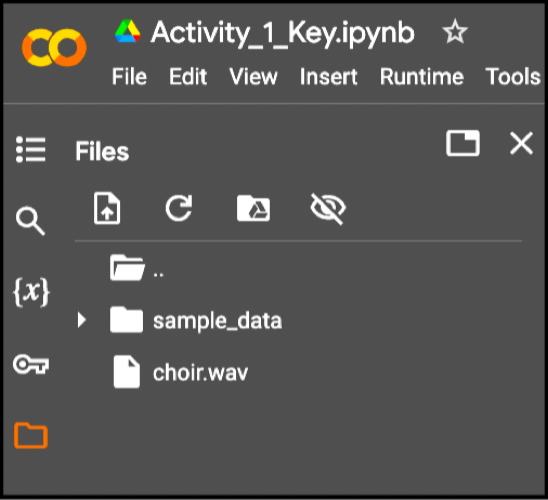

In [ ]:
# Audio from: https://samplefocus.com/samples/dark-choir-140
audio_function = "choir.wav"
Audio(audio_function)

To interpret this file, we will use the `librosa` library which can take these sound files and represent them as numerical data. The numerical data will be stored to a variable called `data` and the sampling rate of this data will be stored to a variable called `sampling_rate`. The sampling rate is in seconds, so when we make our frequency axis, we need to invert it to get $s^{-1}$ or Hz.

In [ ]:
# Import the librosa library and read the load the data into a variable:
import librosa
import numpy as np
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load(audio_function)

# Calculate the FFT of the dataset:
fft_x = np.fft.rfft(data)

# Calculate the frequency axis (x-axis) - inverting the sampling rate:
x_axis = np.fft.rfftfreq(len(data), 1/sampling_rate)

# Plot the FFT
plt.plot(x_axis, np.abs(fft_x))
plt.xlim(-10, 1000)
plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.show()

We can see that we get a spectrum with four peaks on it, we can then overlay some lines onto the plot where our peaks are, and use the following table to convert those lines into notes.

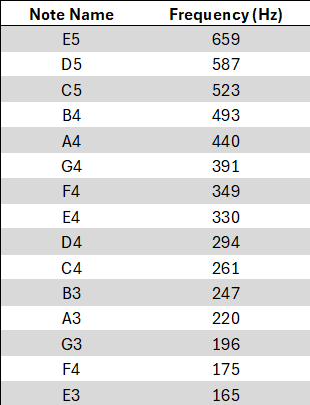

In [ ]:
plt.plot(x_axis, np.abs(fft_x), c="black")
plt.xlim(100, 700)
plt.axvline(220, c='#1D1A39', label="?")
plt.axvline(325, c='#C38EB4', label="?")
plt.axvline(440, c='#86A8CF', label="?")
plt.axvline(530, c='#AE445A', label="?")
plt.legend(loc='upper right', frameon=False)
plt.ylabel("Magnitude")
plt.xlabel("Frequency [Hz]")
plt.show()

### Question 13
13. Using the table provided, label the four prominent peaks in the frequency spectrum of the choir.wav file. What chord is being sung? You may need to use google to look up the name of the chord once you have found the corresponding notes. To narrow down the search, acceptable answers include any combination of {A, B, C, D, E, F, G} and {major, minor}. Hint: the peak frequencies for the four major signals are given in the code used to plot the final figure.